In [1]:
from datetime import datetime

import numpy as np
import matplotlib.pyplot as plt
import h5py

# make graphics inline
%matplotlib inline

from SparkSharpReader import SparkSharpReader
from SharpWriter import SharpWriter

# Define experiment-specific parameters

In [2]:
sid = 27223
fields = ['zpssz','zpssy']

det_size = 44

sharpReader = SparkSharpReader()

# x_c, y_c, xn, yn, threshold
sharpReader.init(75, 92, det_size, det_size, 2)

sharpWriter = SharpWriter()

# pixel size (um), distance (m), wavelength (nm), det_side 
sharpWriter.init(55, 0.64, 0.1331, det_size) 

prbfile = '../../data/27223/recon_27223_r2_t1_probe_ave_rp.npy'
objfile = '../../data/27223/recon_27223_r2_t1_object_ave_rp.npy'

cxifile = '../../data/27223/hxn27223.cxi'

In [3]:
im = np.load(prbfile)
# plt.subplot(1,2,1)
# plt.imshow(abs(prb))
# plt.subplot(1,2,2)
# plt.imshow(np.angle(prb))
# plt.show()
im.shape

(44, 44)

# Get metadata from databroker

In [4]:
print("getting fnames, points from db ...");
t1 = datetime.now();
fnames, ic = sharpReader.get_merlin1_fnames(sid)
xs, ys = sharpReader.get_points(sid, fields)
t2 = datetime.now();
print ("processing time: ", (t2 - t1), ", fnames: ", len(fnames), ", ic: ", len(ic), ", x: ", len(xs), ", y: ", len(ys));

getting fnames, points from db ...
processing time:  0:00:26.789807 , fnames:  67200 , ic:  67200 , x:  67200 , y:  67200


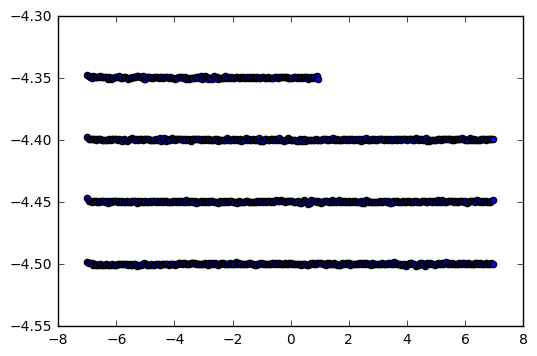

67200 67200


In [5]:
plt.scatter(xs[0:1000], ys[0:1000])
plt.show()
print(len(xs), len(ys))

# Load files directly within this script

In [6]:
print("loading files ...");
t1 = datetime.now();
frames = sharpReader.load_files(sid, fnames, ic)
t2 = datetime.now();
print ("processing time: ", (t2 - t1), "frames: ", len(frames));

loading files ...
processing time:  0:02:12.560411 frames:  67200


# Load files with the Spark workers

In [7]:
partitions = 20
print("loading files ...");
t1 = datetime.now();
frames = sharpReader.load_files_with_spark(sid, fnames, ic, partitions)
t2 = datetime.now();
print ("processing time: ", (t2 - t1), "frames: ", len(frames));

loading files ...
processing time:  0:00:13.670207 frames:  67200


# Write data to the SHARP-NSLS2 input file 

In [8]:
print("write a cxi file ...");
t1 = datetime.now();
sharpWriter.write(cxifile, prbfile, frames, xs, ys)
t2 = datetime.now();
print ("processing time: ", (t2 - t1))

write a cxi file ...
processing time:  0:00:01.991362
